<a href="https://colab.research.google.com/github/moin963khan/Data-/blob/main/Product_Sales_Trends_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

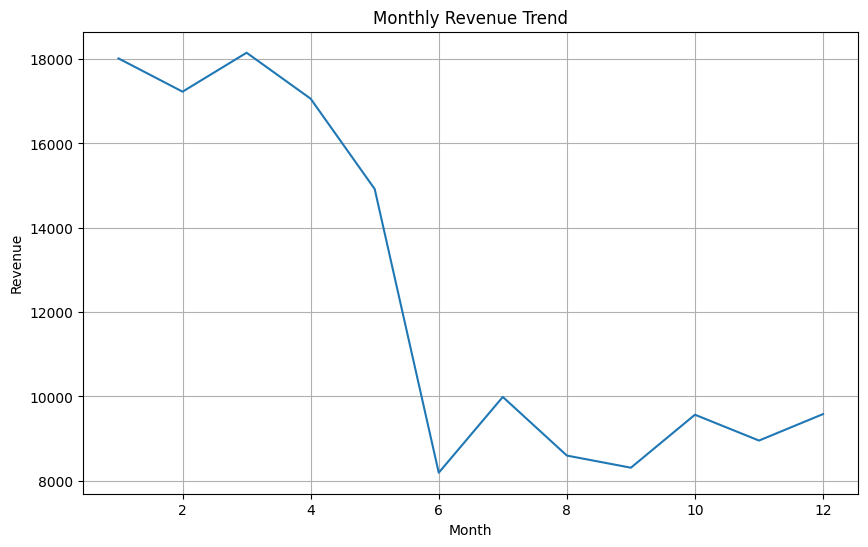

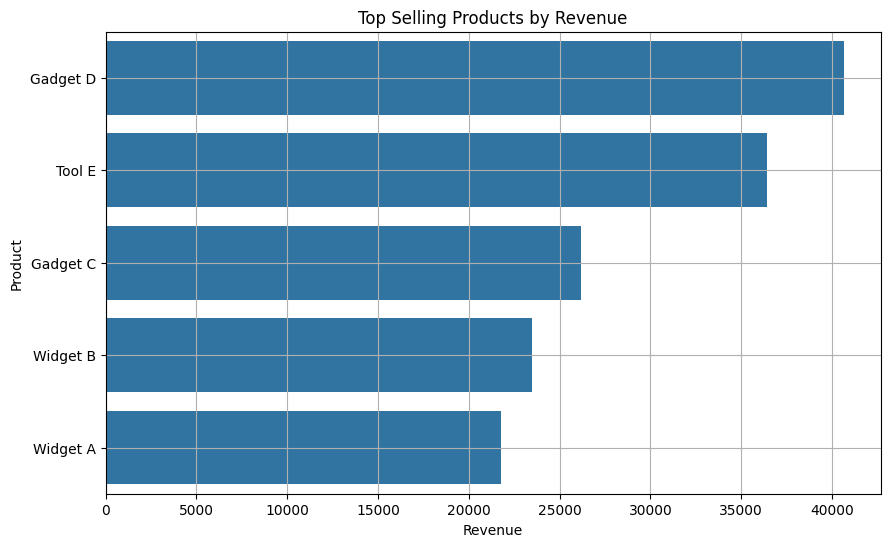

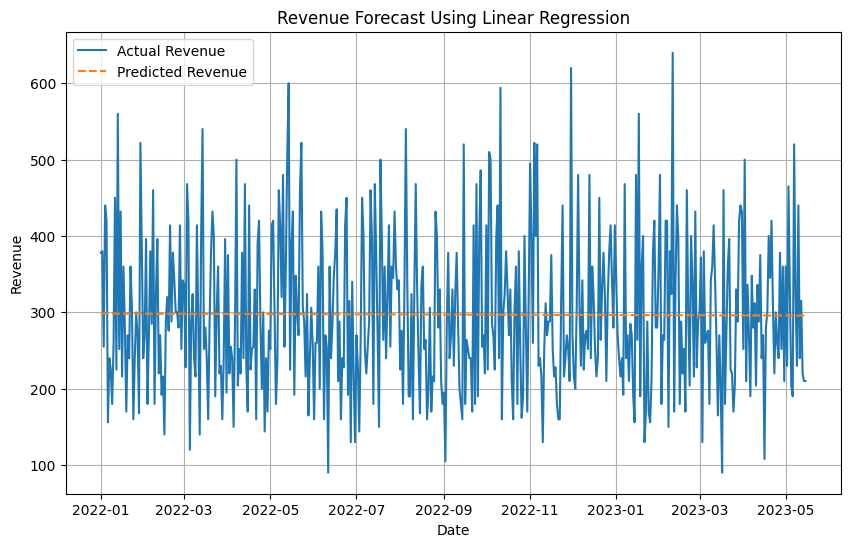

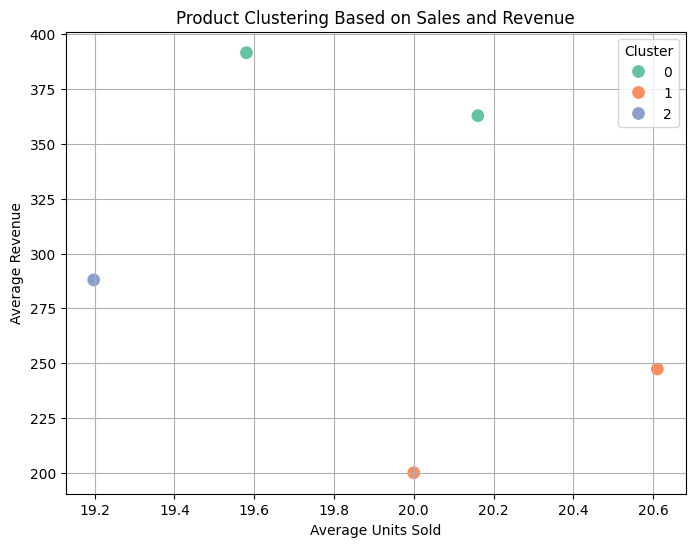

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from datetime import datetime

#Load Dataset
df = pd.read_csv("product_sales_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

#Preprocessing
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek

#Exploratory Data Analysis

# Monthly Revenue Trend
plt.figure(figsize=(10, 6))
monthly_sales = df.groupby('Month')['Revenue'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# Top Selling Products
plt.figure(figsize=(10, 6))
top_products = df.groupby('Product_Name')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top Selling Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.grid(True)
plt.show()

# Linear Regression for Forecasting
df_daily = df.groupby('Date')['Revenue'].sum().reset_index()
df_daily['Day'] = (df_daily['Date'] - df_daily['Date'].min()).dt.days

X = df_daily[['Day']]
y = df_daily['Revenue']

model = LinearRegression()
model.fit(X, y)
df_daily['Predicted_Revenue'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(df_daily['Date'], df_daily['Revenue'], label='Actual Revenue')
plt.plot(df_daily['Date'], df_daily['Predicted_Revenue'], label='Predicted Revenue', linestyle='--')
plt.title("Revenue Forecast Using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()


product_features = df.groupby('Product_Name')[['Units_Sold', 'Revenue']].mean()
kmeans = KMeans(n_clusters=3, random_state=42)
product_features['Cluster'] = kmeans.fit_predict(product_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=product_features, x='Units_Sold', y='Revenue', hue='Cluster', palette='Set2', s=100)
plt.title("Product Clustering Based on Sales and Revenue")
plt.xlabel("Average Units Sold")
plt.ylabel("Average Revenue")
plt.grid(True)
plt.show()
